In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, VotingRegressor, BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge, ElasticNet, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import precision_score, accuracy_score, f1_score, mean_squared_error, mean_absolute_error
from tqdm import tqdm
import os
os.chdir("D://meridianthe4//PML//Cases//Glass_Identification")

In [2]:
glass = pd.read_csv("Glass.csv")
X, y = glass.drop(columns=["Type"]), glass["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [10]:
features = [2, 3, 4, 5]
n_est = [25, 50, 100, 150, 200]
scores = []
for f in features:
    for n in n_est:
        rf = RandomForestClassifier(n_estimators=n, max_features=f, random_state=25)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores.append([f, n, f1_score(y_test, y_pred, average='macro')])
scores_df = pd.DataFrame(scores, columns=["Features", "Trees", "score"])
scores_df.sort_values(by="score", ascending=False)

,Features,Trees,score
4,2,200,0.775760
3,2,150,0.742741
1,2,50,0.742624
10,4,25,0.733196
2,2,100,0.716481
6,3,50,0.713072
0,2,25,0.708053
11,4,50,0.705040
7,3,100,0.704738
5,3,25,0.698238


### Feature Importance

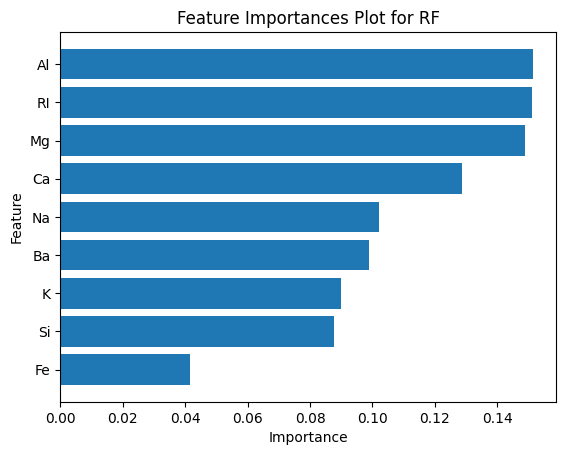

In [12]:
best_model = RandomForestClassifier(random_state=25, n_estimators=150, max_features=3)
best_model.fit(X, y)
df_imp = pd.DataFrame({"feature": X.columns, "importance": best_model.feature_importances_})
df_imp = df_imp.sort_values("importance")
import matplotlib.pyplot as plt
plt.barh(df_imp["feature"], df_imp["importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances Plot for RF")
plt.show()

## Concrete Strength Dataset

In [13]:
os.chdir("D://meridianthe4//PML//Cases//Concrete_Strength")

In [15]:
concrete = pd.read_csv("Concrete_Data.csv")
X, y = concrete.drop(columns=["Strength"]), concrete["Strength"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [17]:
features = [2, 3, 4, 5]
n_est = [25, 50, 100, 150, 200]
scores = []
for f in features:
    for n in n_est:
        rf = RandomForestRegressor(n_estimators=n, max_features=f, random_state=25)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores.append([f, n, mean_absolute_error(y_test, y_pred)])
scores_df = pd.DataFrame(scores, columns=["Features", "Trees", "score"])
scores_df.sort_values(by="score", ascending=True)

,Features,Trees,score
18,5,150,3.732742
19,5,200,3.742589
14,4,200,3.748906
17,5,100,3.754567
11,4,50,3.761124
10,4,25,3.768166
13,4,150,3.770464
12,4,100,3.785611
16,5,50,3.807758
9,3,200,3.826417


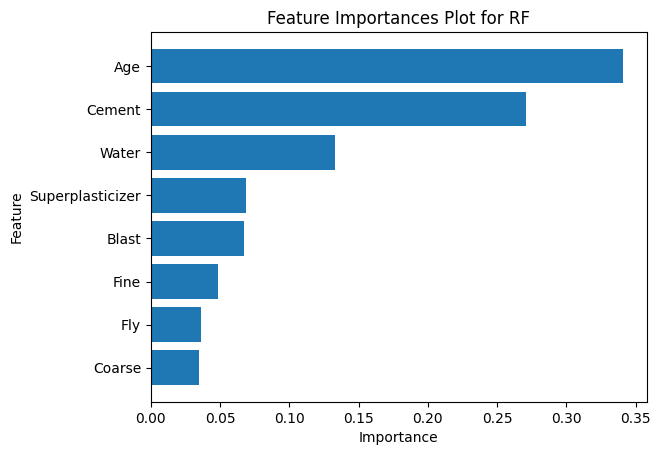

In [18]:
best_model = RandomForestRegressor(random_state=25, n_estimators=150, max_features=5)
best_model.fit(X, y)
df_imp = pd.DataFrame({"feature": X.columns, "importance": best_model.feature_importances_})
df_imp = df_imp.sort_values("importance")
import matplotlib.pyplot as plt
plt.barh(df_imp["feature"], df_imp["importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances Plot for RF")
plt.show()